In [1]:

pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [6]:
bikes = pd.read_csv('/Users/xinyuanliang/Desktop/MBAN 6110/bikes_sharing.csv')

In [7]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


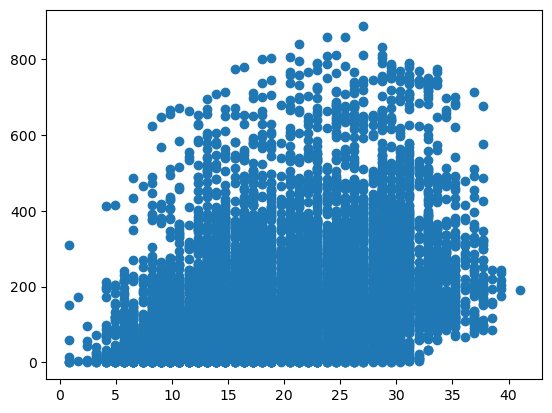

In [8]:
plt.scatter(bikes['temp'], bikes['registered'])

In [9]:
x=bikes['temp']
y=bikes['casual']

In [ ]:
result= ols()

In [13]:
results = ols("casual ~ temp + humidity + workingday", data=bikes).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2766.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:42:07   Log-Likelihood:                -54939.
No. Observations:               10886   AIC:                         1.099e+05
Df Residuals:                   10882   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1426      1.663     31.961      0.0

In [18]:
"y_hat= 53.1426 +2.9255temp -0.8365humidity - 36.0416workingday"

'y_hat= 53.1426 +2.9255temp -0.8365humidity - 36.0416workingday'

In [14]:
53.1426 +(2.9255*9.84) - (0.8365*81) - (36.0416*0)

14.173019999999994

In [20]:
pred_vals = results.predict(bikes[['temp', 'humidity', 'workingday']])

In [21]:
pred_vals

0        14.175362
1        12.612922
2        12.612922
3        19.194189
4        19.194189
           ...    
10881    20.856745
10882    12.602536
10883     6.857740
10884     6.857740
10885     0.276474
Length: 10886, dtype: float64

In [22]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}), bikes['casual']], axis=1)

In [23]:
res['error']=res['y_hat']-res['casual']

In [26]:
res['sq_error']= res['error']**2


In [27]:
np.sqrt(res['sq_error'].mean())

37.630976661566194

(array([   9.,   18.,   48.,   95.,  160.,  315., 2110., 5562., 2344.,
         225.]),
 array([-278.91580946, -241.14950457, -203.38319967, -165.61689478,
        -127.85058988,  -90.08428498,  -52.31798009,  -14.55167519,
          23.2146297 ,   60.9809346 ,   98.7472395 ]),
 <BarContainer object of 10 artists>)

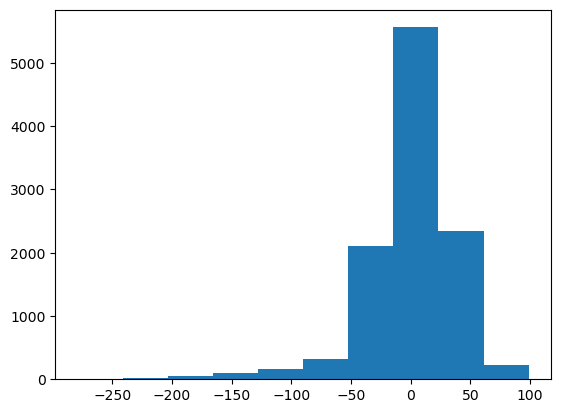

In [28]:
plt.hist(res['error'])

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

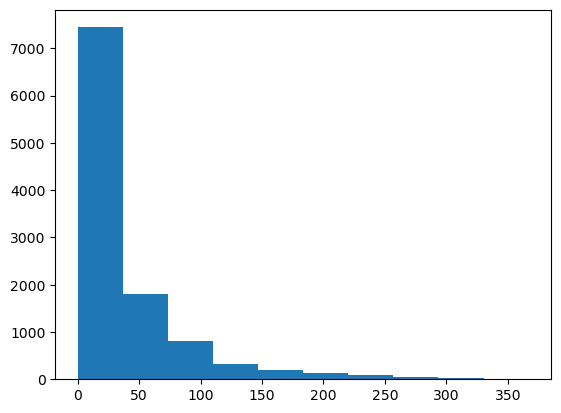

In [29]:
plt.hist(bikes['casual'])